In [141]:
import pandas as pd
import scipy.stats as stats #for statistical calculations
import numpy as np

In [142]:
data_frame = pd.read_csv("pet_adoption_data.csv")
data_frame.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [143]:
dogs = data_frame.query("PetType == 'Dog'")
dogs
white_dogs = dogs.query("Color == 'White'")
small_dogs = white_dogs.query("Size == 'Small'")
else_dogs = dogs.query("Color != 'White'")
else_dogs = pd.concat([else_dogs,white_dogs.query("Size != 'Small'")])
print(len(else_dogs),len(small_dogs))
small_dogs = small_dogs.query("AdoptionLikelihood == 1")
else_dogs = else_dogs.query("AdoptionLikelihood == 1")
print(len(else_dogs),len(small_dogs))
stats.mannwhitneyu(np.array(small_dogs['TimeInShelterDays']),np.array(else_dogs['TimeInShelterDays']),alternative='less')

482 40
226 16


MannwhitneyuResult(statistic=1315.5, pvalue=0.03450025015193805)

In [144]:
def U_test(df, pet_type=None, breed=None, max_age_months=None, color=None, size=None, adopted = None,direction = 'two-sided'):
    pets = filter_pets(df,pet_type, breed, max_age_months, color, size, adopted )
    return stats.mannwhitneyu(np.array(pets[0]['TimeInShelterDays']),np.array(pets[1]['TimeInShelterDays']),alternative=direction)

In [151]:
U_test(data_frame,pet_type='Cat',color='Orange',direction='greater')

MannwhitneyuResult(statistic=22609.0, pvalue=0.19198297911249085)

In [146]:
U_test(data_frame,pet_type='Dog',size='Small',color='White',direction='less')

MannwhitneyuResult(statistic=8048.0, pvalue=0.04125297993219776)

find the empirical function of small_white_dog and orange_cats

In [147]:
def filter_pets(df, pet_type=None, breed=None, max_age_months=None, color=None, size=None, adopted = None):
    """
    Filter the pets DataFrame based on specified criteria.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing pet data.
    pet_type (str): The type of pet to filter by.
    breed (str): The breed of the pet to filter by.
    max_age_months (int): The maximum age of the pet in months to filter by (pets younger than this age).
    color (str): The color of the pet to filter by. ('white', 'black', 'orange')
    size (str): The size of the pet to filter by. ('small', 'medium', 'large')
    
    Returns:
    pd.DataFrame: A DataFrame filtered by the specified criteria.
    pd.DataFrame: A complementary DataFrame with pets that do not match the criteria.
    """
    
    df_filtered = df
    df_complementary = df
    
    # Filter by pet type if specified
    if pet_type:
        df_filtered = df_filtered[df_filtered['PetType'] == pet_type]
        df_complementary = df_complementary[df_complementary['PetType'] == pet_type]
        
    # Apply filters to get the main subset
    if breed:
        df_filtered = df_filtered[df_filtered['Breed'] == breed]
    if max_age_months is not None:
        df_filtered = df_filtered[df_filtered['AgeMonths'] < max_age_months]
    if color:
        df_filtered = df_filtered[df_filtered['Color'] == color]

    if adopted:
        df_filtered = df_filtered[df_filtered['AdoptionLikelihood'] == adopted]
        df_complementary = df_complementary[df_complementary['AdoptionLikelihood'] == adopted]
    if size:
        df_filtered = df_filtered[df_filtered['Size'] == size]
    
    # Create the complementary subset by excluding the filtered results
    df_complementary = df_complementary[~df_complementary.index.isin(df_filtered.index)]
    
    return df_filtered, df_complementary

In [148]:
dogs = data_frame.query("PetType == 'Dog'")
white_dogs = dogs.query("Color == 'White'")
small_dogs = white_dogs.query("Size == 'Small'")
small_dogs.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
23,523,Dog,Golden Retriever,86,White,Small,8.475576,1,0,30,405,0,0
54,554,Dog,Golden Retriever,23,White,Small,26.127081,1,0,63,206,0,1
164,664,Dog,Labrador,130,White,Small,18.482545,1,0,36,18,0,1
182,682,Dog,Poodle,4,White,Small,4.422175,1,0,1,222,0,1
188,688,Dog,Poodle,124,White,Small,6.071634,1,0,7,9,0,0


In [149]:
check = filter_pets(data_frame,pet_type="Dog",color="White",size="Small",adopted=1)
print(len(check[0]),len(check[1]))
print(check[0].head())
print(check[1].head())


16 226
     PetID PetType             Breed  AgeMonths  Color   Size   WeightKg  \
54     554     Dog  Golden Retriever         23  White  Small  26.127081   
164    664     Dog          Labrador        130  White  Small  18.482545   
182    682     Dog            Poodle          4  White  Small   4.422175   
536   1036     Dog          Labrador         39  White  Small   5.211526   
858   1358     Dog          Labrador        131  White  Small  24.473397   

     Vaccinated  HealthCondition  TimeInShelterDays  AdoptionFee  \
54            1                0                 63          206   
164           1                0                 36           18   
182           1                0                  1          222   
536           1                0                  9          307   
858           1                0                 51          119   

     PreviousOwner  AdoptionLikelihood  
54               0                   1  
164              0                   1  
182 

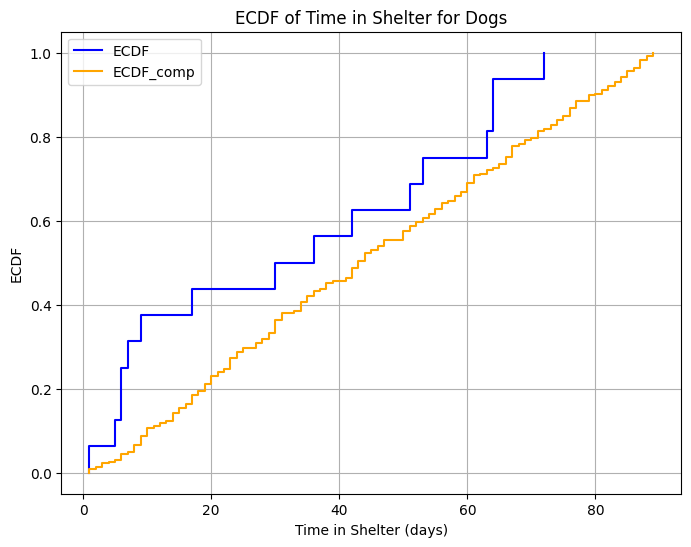

In [150]:



import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

dogs_df = check[0]
time_in_shelter = dogs_df['TimeInShelterDays']

# Compute the ECDF
ecdf = ECDF(time_in_shelter)

#complanitory
dogs_df_comp = check[1]
time_in_shelter_comp = dogs_df_comp['TimeInShelterDays']

# Compute the ECDF
ecdf_comp = ECDF(time_in_shelter_comp)

# Plot the ECDF
plt.figure(figsize=(8, 6))
plt.step(ecdf.x, ecdf.y, where='post', label='ECDF', color='blue')
plt.step(ecdf_comp.x, ecdf_comp.y, where='post', label='ECDF_comp', color='orange')

plt.xlabel('Time in Shelter (days)')
plt.ylabel('ECDF')
plt.title('ECDF of Time in Shelter for Dogs')
plt.legend()
plt.grid(True)
plt.show()
